# Feedforward: Building a ReLU neural network

## 1

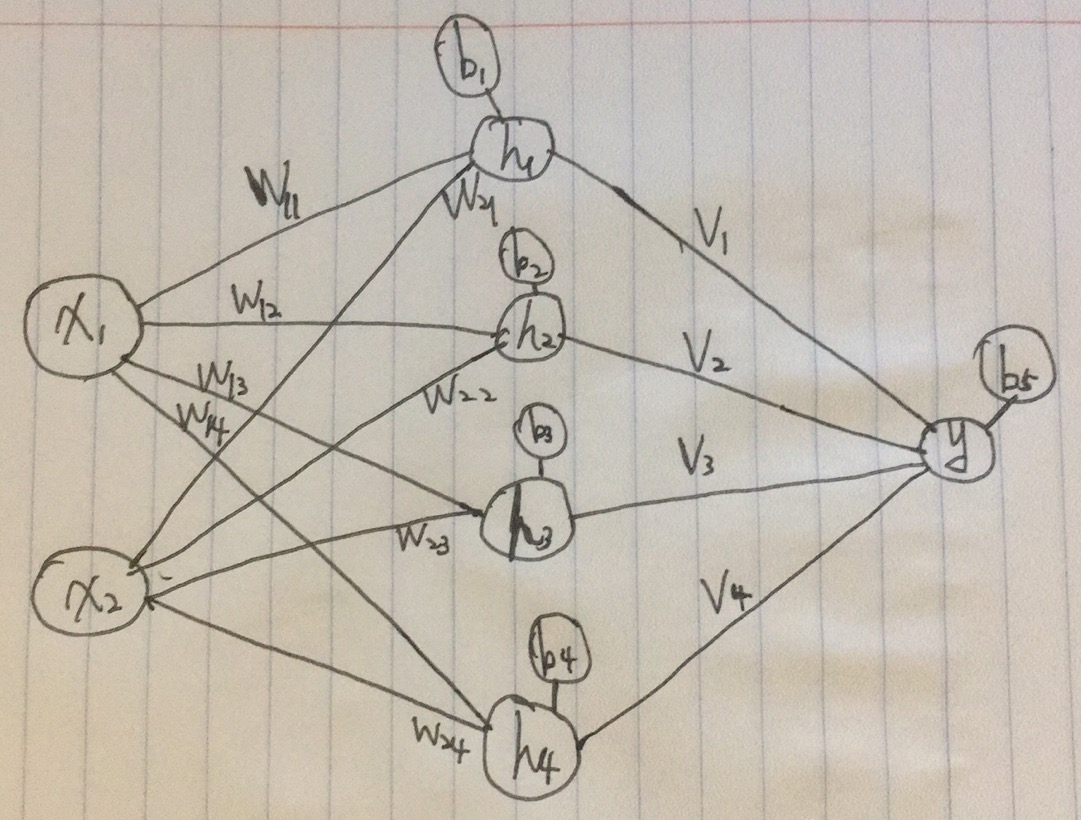

In [1]:
from IPython.display import Image
Image(filename='A2.jpg',width=400,height=400)

## 2

$h_1 = max(0, w_{11}x_1 + w_{21}x_2 + b_1)$

$h_2 = max(0, w_{12}x_1 + w_{22}x_2 + b_2)$

$h_3 = max(0, w_{13}x_1 + w_{23}x_2 + b_3)$

$h_4 = max(0, w_{14}x_1 + w_{24}x_2 + b_4)$

$y = sigmoid(v_1h_1 + v_2h_2 + v_3h_3 + v_4h_4 + b_5)$

## 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def Relu(x):
    return(np.maximum(0, x))
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def ff_nn_Relu(input, w, v, b, c):
    h = Relu(w.T @ input.T + b)
    z = sigmoid(h.T @ v + c)
    return z

## 4

In [3]:
w = np.array([[1, -1, 0, 1],
              [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0]).reshape(4, 1)
v = np.array([1, 0, -1, 1]).reshape(4, 1)
c = np.array([1])
x= np.array([[1, -1],
             [0, -1],
             [0, 1]])
ff_nn_Relu(x, w, v, b, c)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

# Gradient Descent

## 1

$\frac{\partial f}{\partial x} = -3x^2 - 100*(2y^2 - x)$

$\frac{\partial f}{\partial y} = 400y*(2y^2 - x)$

## 2

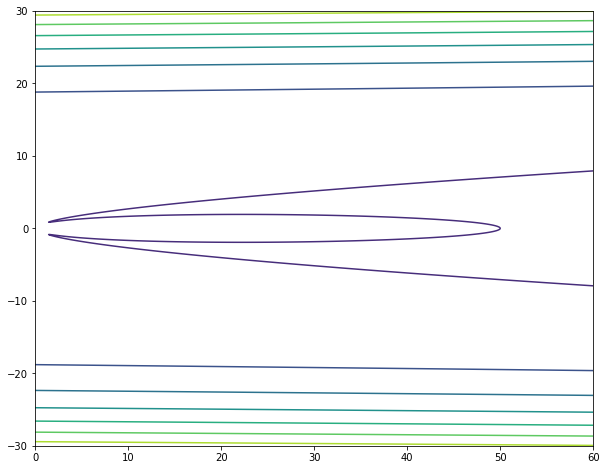

In [4]:
xlist = np.linspace(0, 60, 2000)
ylist = np.linspace(-30, 30, 2000)
x, y = np.meshgrid(xlist, ylist)
f = (3 - x**3) + 50 * (2*y**2 - x)**2
plt.figure(figsize = (10, 8))
plt.contour(x, y, f)
plt.show()

## 3

In [5]:
def f(x):
    return (3 - x[0]**3) + 50*(2*x[1]**2 - x[0])**2

def grad_f(x):
    df_dx = -3*x[0]**2 - 100*(2*x[1]**2 - x[0])
    df_dy = 400*x[1]*(2*x[1]**2 - x[0])
    return np.array([df_dx, df_dy])

def minimum(x, iters, alpha):
    z = f(x)
    result = [x]
    i = 0
    while i < iters:
        x = x - alpha*grad_f(x)
        z_new = f(x)
        if z_new > z:
            print("The minimun is about {} at{}".format(z, result[-1]))
            break
        z = z_new
        result.append(x)
        i += 1
    
    print("Minimal not found yet, and the minimun we get now is {} at {}".format(z, result[-1]))
    return result, z

In [6]:
def graph(iters, alpha, traj, z):
    xlist = np.linspace(-1, 1, 100)
    ylist = np.linspace(0, 2, 100)
    x, y = np.meshgrid(xlist, ylist)
    f = (3 - x**3) + 50 * (2*y**2 - x)**2
    plt.figure(figsize = (10, 8))
    plt.contour(x, y, f)
    xs = [X[0] for X in traj]
    ys = [X[1] for X in traj] 
    plt.plot(xs, ys, '-o', color = 'red')
    annotation = str(z) + ' at (' + str(xs[-1]) + ',' + str(ys[-1]) + ')'
    plt.annotate(annotation, xy = (xs[-1], ys[-1]))
    plt.show()

learning rate of 0.0001

Minimal not found yet, and the minimun we get now is 2.9808800889734326 at [0.26750913 0.36525732]


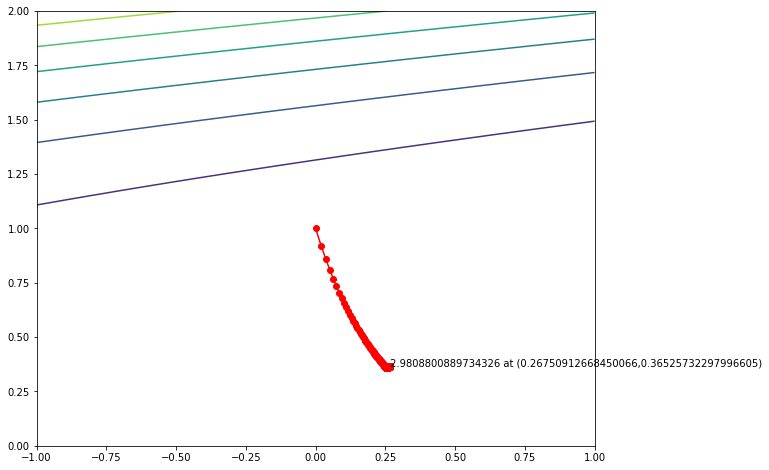

In [7]:
x = np.array([0,1])
iters = 1000
traj1, z1 = minimum(x, iters, 0.0001)
graph(1000, 0.0001, traj1, z1)

learning rate of 0.0005

Minimal not found yet, and the minimun we get now is 2.9703396722196778 at [0.30966494 0.39296192]


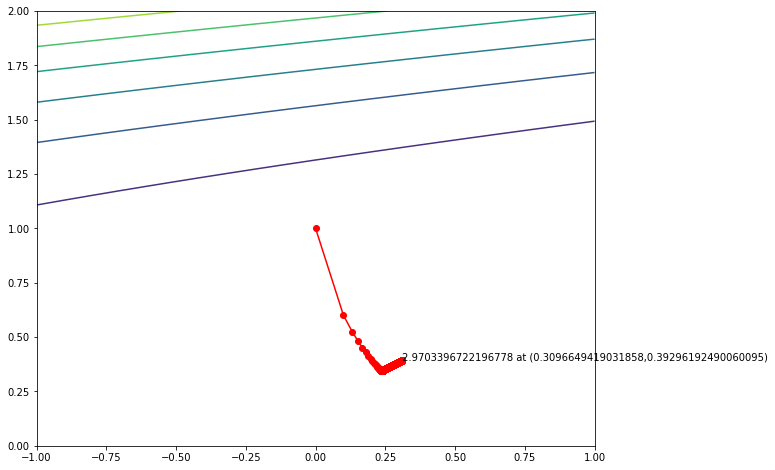

In [8]:
traj2, z2 = minimum(x, iters, 0.0005)
graph(1000, 0.0005, traj2, z2)

learning rate of 0.001

Minimal not found yet, and the minimun we get now is 2.9948466180085678 at [0.17280741 0.29362527]


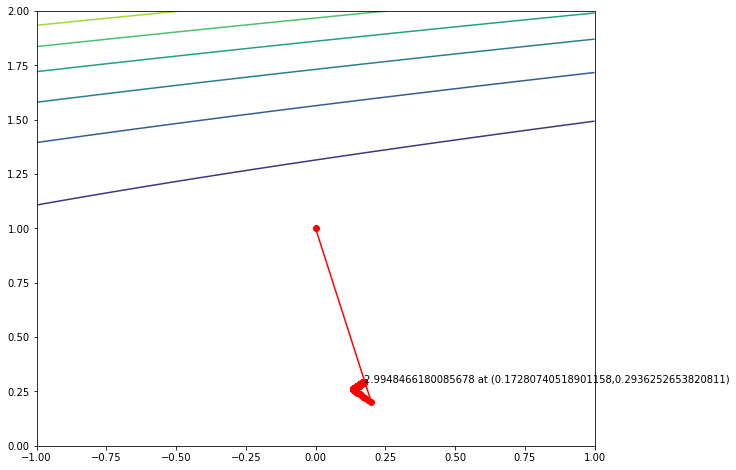

In [9]:
traj3, z3 = minimum(x, iters, 0.001)
graph(1000, 0.0005, traj3, z3)

## 4

In [10]:
def momentum(x, iters, alpha, esp):
    z = f(x)
    result = [x]
    v = np.zeros(x.size)
    i = 0
    while i < iters:
        v = alpha*v + esp*grad_f(x)
        x = x - v
        z_new = f(x)
        if z_new > z:
            print("The minimun is about {} at {}".format(z, result[-1]))
            break
        z = z_new
        result.append(x)
        i += 1

    print("Minimal not found yet, and the minimun we get now is {} at {}".format(z, result[-1]))
    return result, z

In [11]:
def graph(iters, alpha, traj, z):
    xlist = np.linspace(-1, 1, 100)
    ylist = np.linspace(0, 2, 100)
    x, y = np.meshgrid(xlist, ylist)
    f = (3 - x**3) + 50 * (2*y**2 - x)**2
    plt.figure(figsize = (10, 8))
    plt.contour(x, y, f)
    xs = [X[0] for X in traj]
    ys = [X[1] for X in traj] 
    plt.plot(xs, ys, '-o', color = 'red')
    annotation = str(z) + ' at (' + str(xs[-1]) + ',' + str(ys[-1]) + ')'
    plt.annotate(annotation, xy = (xs[-1], ys[-1]))
    plt.show()

alpha = 0.0001 esp = 0.0001

Minimal not found yet, and the minimun we get now is 2.980879970241064 at [0.26750968 0.3652577 ]


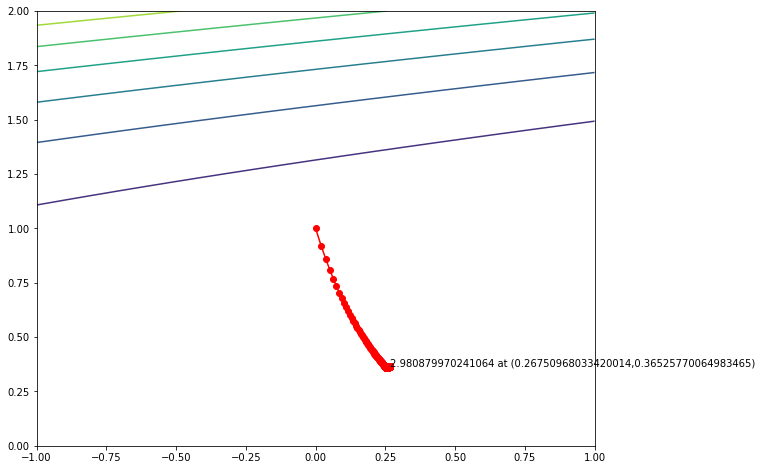

In [12]:
x = np.array([0, 1])
iters = 1000
traj1, z1 = momentum(x, iters, 0.0001, 0.0001)
graph(1000, 0.0001, traj1, z1)

alpha = 0.0005, esp = 0.0005

Minimal not found yet, and the minimun we get now is 2.970341734279218 at [0.30965777 0.39295738]


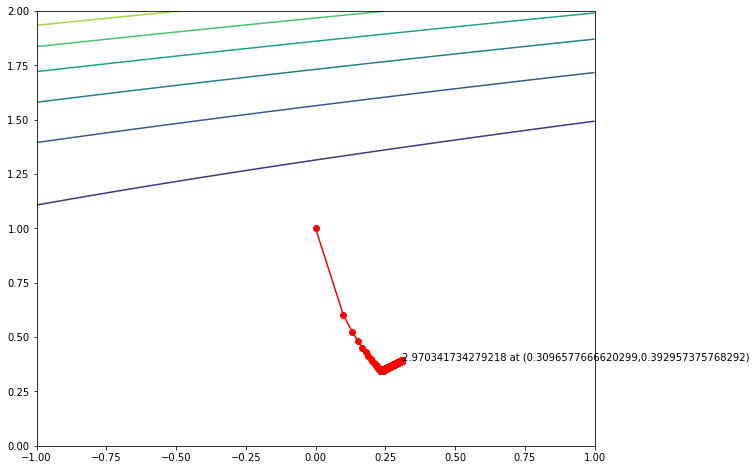

In [13]:
traj2, z2 = momentum(x, iters, 0.0005, 0.0005)
graph(1000, 0.0005, traj2, z2)

alpha = 0.001, esp = 0.001

Minimal not found yet, and the minimun we get now is 2.9949073515734237 at [0.17212591 0.29304625]


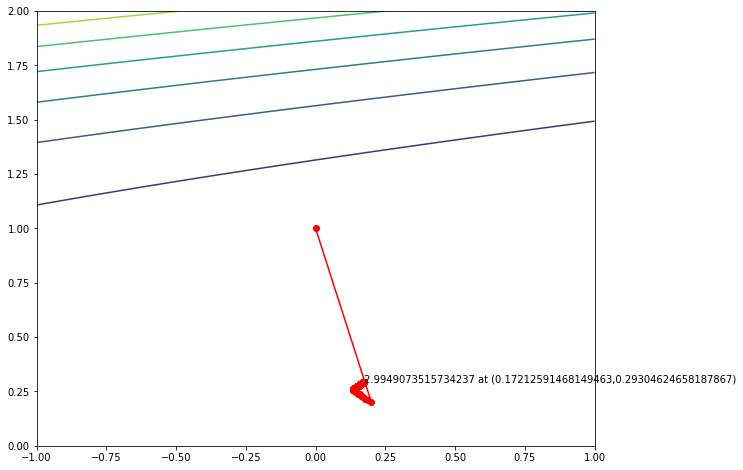

In [14]:
traj3, z3 = momentum(x, iters, 0.001, 0.001)
graph(1000, 0.001, traj3, z3)

# Backprop

## 1

$h_1 = max(0, w_{11}x_1 + w_{21}x_2 + b_1)$

$h_2 = max(0, w_{12}x_1 + w_{22}x_2 + b_2)$

$h_3 = max(0, w_{13}x_1 + w_{23}x_2 + b_3)$

$h_4 = max(0, w_{14}x_1 + w_{24}x_2 + b_4)$

$\hat y = sigmoid(v_1h_1 + v_2h_2 + v_3h_3 + v_4h_4 + b_5)$

$L = -ylog(\hat y) - (1 - y)log(1 - \hat y)$

$\frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat y}\frac{\partial \hat y}{\partial v_i} = (-\frac{y}{\hat y} + \frac{1 - y}{1 - \hat y})\hat y(1 - \hat y)h_i$

$\frac{\partial L}{\partial b_5} = \frac{\partial L}{\partial \hat y}\frac{\partial \hat y}{\partial b_5} = (-\frac{y}{\hat y} + \frac{1 - y}{1 - \hat y})\hat y(1 - \hat y)$

$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial \hat y}\frac{\partial \hat y}{\partial out_j}\frac{\partial out_j}{\partial \hat in_j}\frac{\partial \hat in_j}{\partial w_{ij}} = (-\frac{y}{\hat y} + \frac{1 - y}{1 - \hat y})\hat y(1 - \hat y)v_jx_i$ if $w_{1j}x_1 + w_{2j}x_2 + b_j$ > 0

else $\frac{\partial L}{\partial w_{ij}}$ = 0

$\frac{\partial L}{\partial b_j} = \frac{\partial L}{\partial \hat y}\frac{\partial \hat y}{\partial out_j}\frac{\partial out_j}{\partial \hat in_j}\frac{\partial \hat in_j}{\partial b_j} = (-\frac{y}{\hat y} + \frac{1 - y}{1 - \hat y})\hat y(1 - \hat y)v_j$ if $w_{1j}x_1 + w_{2j}x_2 + b_j$ > 0

else $\frac{\partial L}{\partial b_j}$ = 0

## 2

In [15]:
def Relu(x):
    return(np.maximum(0, x))

def grad_loss(y, yhat):
    return -y/yhat + (1 - y)/(1 - yhat)

def grad_sigmoid(y):
    return y*(1 - y)

def grad_f(x, y, w, v, b, c):
    h = Relu(w @ x + b)
    yhat = sigmoid(v @ h + c)
    grad_v = grad_loss(y,yhat) * grad_sigmoid(yhat) * h
    grad_c = grad_loss(y,yhat) * grad_sigmoid(yhat)
    #partialw = grad_loss(y,yhat)*grad_sigmoid(yhat)*v*x
    #partialb = grad_loss(y,yhat)*grad_sigmoid(yhat)*v
    a = w @ x + b
    grad_w = np.zeros(shape = (4, 2))
    grad_b = np.zeros(shape = (4, 1))
    for j in range(len(a)):
            if a[j] < 0:
                grad_w[j][0] = 0
                grad_w[j][1] = 0
                grad_b[j] = 0
                continue
            else:
                grad_w[j] = grad_loss(y,yhat) * grad_sigmoid(yhat) * v[j] * x
                grad_b[j] = grad_loss(y,yhat) * grad_sigmoid(yhat) * v[j]

    return (grad_w, grad_b, grad_v, grad_c)

## 3

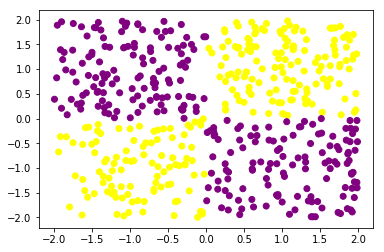

In [16]:
N = 500
n = np.random.uniform(-2, 2, N*2).reshape(N,2)
color = []
for i in range(N):
    if n[i][0] * n[i][1] < 0:
        color.append('purple')
    else:
        color.append('yellow')
plt.scatter(n[:, 0], n[:, 1], color = color)

## 4

In [17]:
def forward(x, y, w, v, b, c):
    # hidden layer
    h = np.maximum(0, w @ x + b)
    # output 
    y = sigmoid(v @ h + c)
    return h, y

def loss(y, yhat):
    return -y*np.log(yhat) - (1 - y)*np.log(1 - yhat)

In [18]:
def gradient_ann(x, y, w, v, b, c, lr, iters):
    losses= []
    for i in range(iters):
        dw = np.zeros(shape=(4, 2))
        db = np.zeros(shape=(4))
        dc = 0
        dv = np.zeros(shape=(4))
        
        # sum of the binary loss of each input
        sumloss = 0
        y_hat = []
        
        # for each input (x,y), compute the partial derivative
        for i in range(len(y)):
            h, yhat = forward(x[i], y[i], w, v, b, c)
            sumloss += loss(y[i], yhat)
            
            # dl/dv
            dv += (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*h
            
            # dl/dc
            dc += (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)

            # dl/dw, dl/db
            for j in range(4):
                if h[j] > 0:
                    dw[j] +=  (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*v[j]*x[i]
                    db[j] +=  (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*v[j]
            
            y_hat.append(yhat)
            
        # update the parameters 
        w = w - lr*dw/len(y)
        v = v - lr*dv/len(y)
        c = c - lr*dc/len(y)
        b = b - lr*db/len(y)
        
        losses.append(sumloss)
    return losses, y_hat

In [19]:
w = np.random.randn(8).reshape((4, 2))
b = np.random.randn(4).reshape(4)
v = np.random.randn(4).reshape(4)
c = np.random.randn(1)
y = [1]*N
for i in range(N):
    if color[i] == 'purple':
        y[i]=0
lr = 0.12
iterations=1000

In [20]:
losses, yhat =  gradient_ann(n, y, w, v, b, c, lr, iters)

Text(0, 0.5, 'loss')

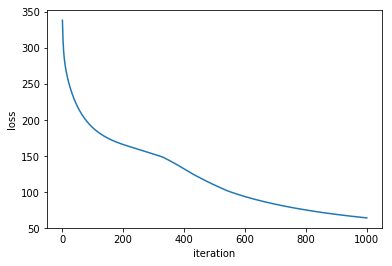

In [21]:
plt.plot(np.arange(1,iters + 1),losses)
plt.xlabel('iteration')
plt.ylabel('loss')

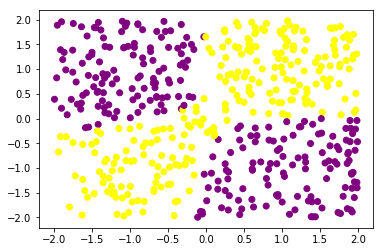

In [22]:
c = ['yellow']*N
for i in range(N):
    if yhat[i] < 0.5:
        c[i] = 'purple'
plt.scatter(n[:,0], n[:,1], color = c)

## 5

In [23]:
def gradient_ann_mon(x, y, w, v, b, c, lr, eps, iters):
    losses= []
    dw_new = np.zeros(shape=(4, 2))
    db_new = np.zeros(shape=(4))
    dc_new = 0
    dv_new = np.zeros(shape=(4))
    
    for i in range(iters):
        dw = np.zeros(shape=(4, 2))
        db = np.zeros(shape=(4))
        dc = 0
        dv = np.zeros(shape=(4))
        
        # sum of the binary loss of each input
        sumloss = 0
        y_hat = []
        
        # for each input (x,y), compute the partial derivative
        for i in range(len(y)):
            h, yhat = forward(x[i], y[i], w, v, b, c)
            sumloss += loss(y[i], yhat)
            
            # dl/dv
            dv += (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*h
            
            # dl/dc
            dc += (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)

            # dl/dw, dl/db
            for j in range(4):
                if h[j] > 0:
                    dw[j] +=  (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*v[j]*x[i]
                    db[j] +=  (-y[i]/yhat + (1 - y[i])/(1 - yhat))*yhat*(1 - yhat)*v[j]
            
            y_hat.append(yhat)
            
        losses.append(sumloss)
        
        #update 
        dw_new = lr*dw_new + eps*dw/len(y)
        dv_new = lr*dv_new + eps*dv/len(y)
        dc_new = lr*dc_new + eps*dc/len(y)
        db_new = lr*dv_new + eps*db/len(y)
        
        # update the parameters 
        w = w - dw_new
        v = v - dv_new
        c = c - dc_new
        b = b - db_new

    return losses, y_hat

In [24]:
w = np.random.randn(8).reshape((4, 2))
b = np.random.randn(4).reshape(4)
v = np.random.randn(4).reshape(4)
c = np.random.randn(1)
eps = lr
losses1, yhat1 = gradient_ann_mon(n, y, w, v, b, c, lr, eps, iters)

Text(0, 0.5, 'loss')

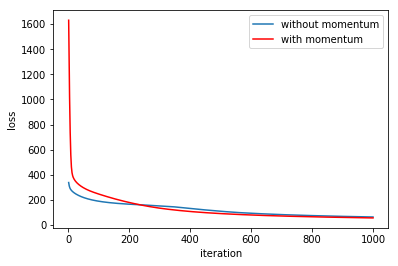

In [25]:
plt.plot(np.arange(1, iterations + 1), losses, label = 'without momentum')
plt.plot(np.arange(1, iterations + 1), losses1, label = 'with momentum',color = 'red')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

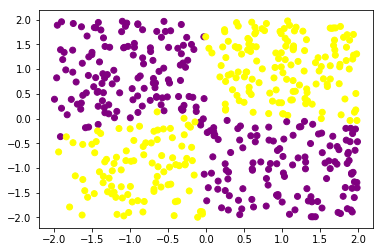

In [26]:
c = ['purple']*N
for i in range(N):
    if yhat1[i] > 0.5:
        c[i] = 'yellow'
plt.scatter(n[:,0], n[:,1], color = c)

When keeping the same learning rate, gradient descent with momentum converges more efficiently.

## 6

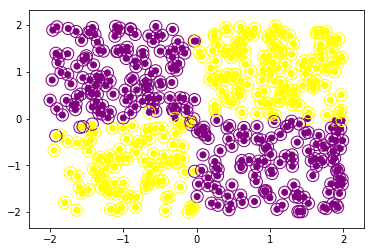

In [27]:
plt.scatter(n[:,0], n[:,1], color = color)
plt.scatter(n[:,0], n[:,1], color = '', edgecolors = c, label = 'o', s = 150)
plt.show()